# Imports packages

In [1]:
# we will import everything here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.transform import resize

from task_1 import read_file, center_data, reduce_dim_pca, get_contained_energy_in_each_component, approximate_pca, get_energy_loss

%reload_ext autoreload 
%autoreload 2 

# Task 1/4: Principal component analysis -- PART 1

## Read the input file 'pca_dataset.txt'

Text(0, 0.5, 'f(x)')

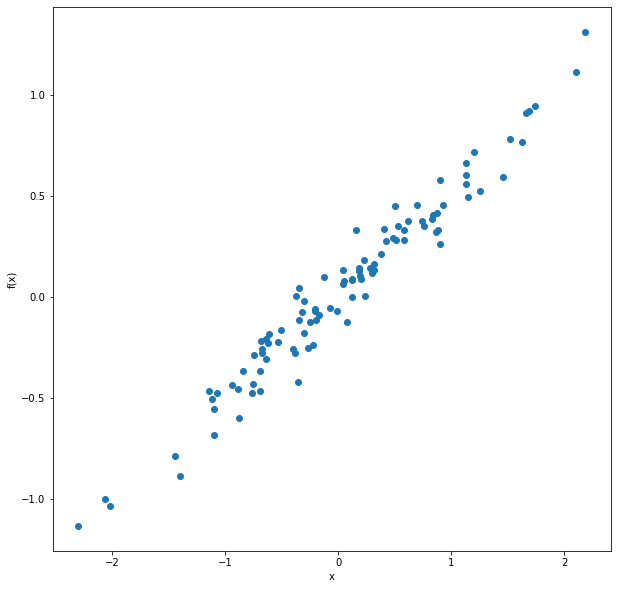

In [2]:
data_x = read_file("pca_dataset.txt", 0, "x")
data_y = read_file("pca_dataset.txt", 1, "f(x)")

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(data_x, data_y)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
#fig.savefig("ex0-figure.pdf")

## PCA 1/2: Center the data

Text(0.5, 1.0, 'X_centered')

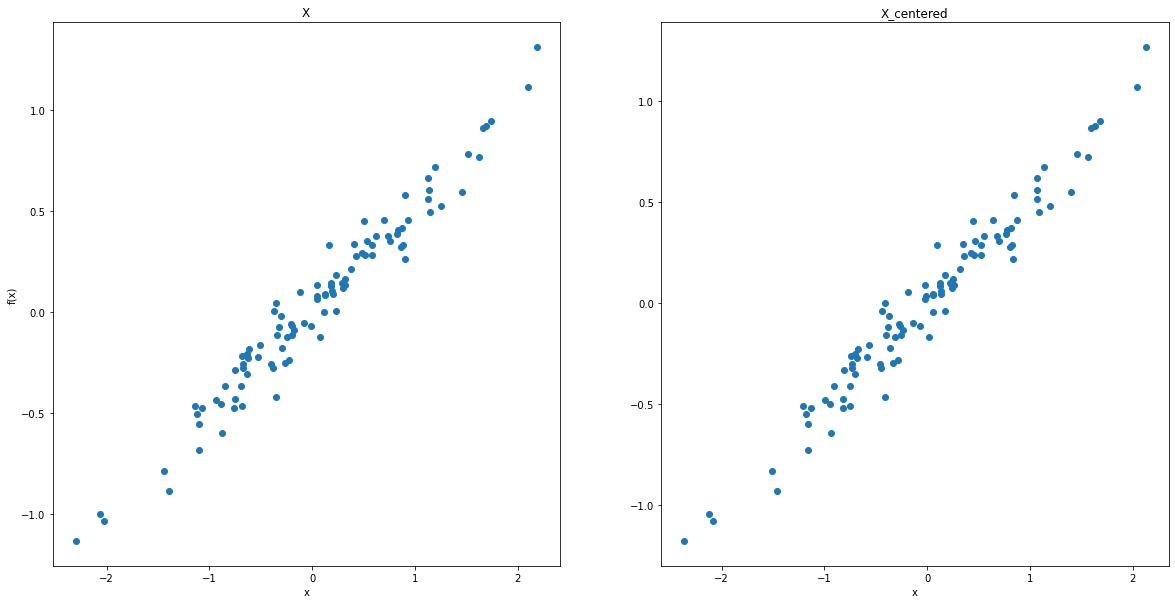

In [3]:
# Create the matrix X with dimension (N, 2). Each sample has the dimension 2
X = np.column_stack((data_x, data_y))

# Center the matrix
X_centered = center_data(X)

# plot the centered data
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(data_x, data_y)
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_title("X")

ax[1].scatter(X_centered.T[0], X_centered.T[1])
ax[1].set_xlabel("x")
ax[1].set_title("X_centered")

## PCA 2/2: Compute SVD and approximate one-dimensional representation

(BLACK) First column of V: [-0.88938337 -0.45716213]
(RED) Second column of V: [ 0.45716213 -0.88938337]
First principal component: 9.943404944386826
Second principal component: 0.8262420091547046


(-2.5751665236912062,
 2.4229235137131893,
 -1.3236908416678426,
 1.245434668266292)

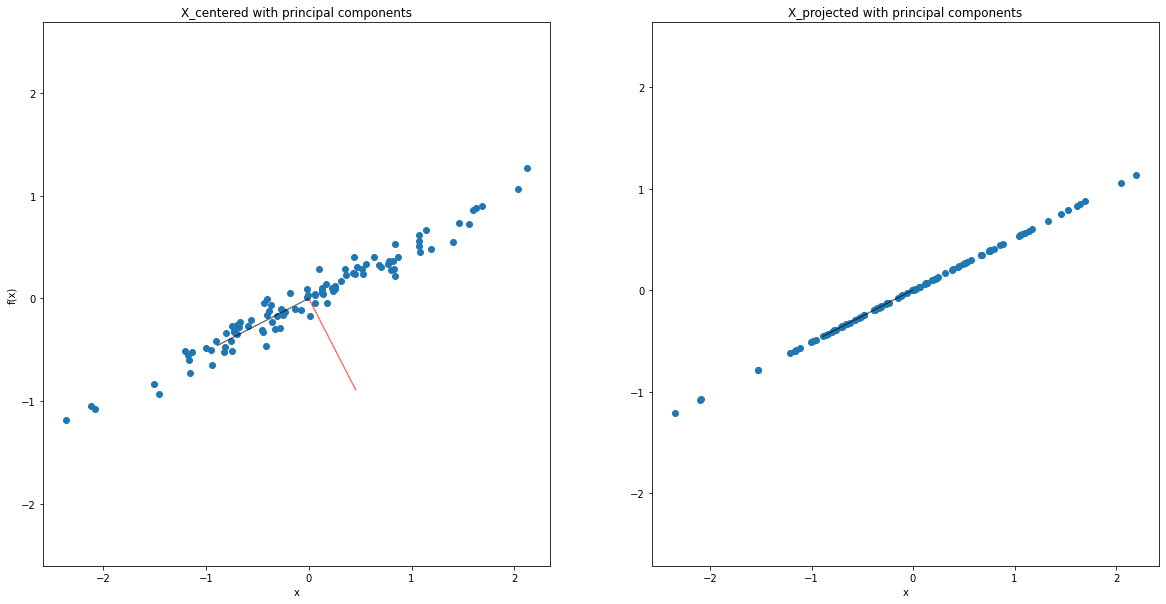

In [4]:
# apply SVD 
U, S, Vh = np.linalg.svd(X_centered)

print("(BLACK) First column of V:",Vh[0])
print("(RED) Second column of V:", Vh[1])

print("First principal component:", S[0])
print("Second principal component:", S[1])

# Compute the SVD and truncate the lowest variance dimensions such that only top k (= 1 in this task) singular values are used
# In this case the red principal component will be removed since the varianca of the data around this dimension is very low
# compared to the black line (the data is would be more representable -- spread across the black line if we project the data
# samples onto the black line. However this is not the case with the red line. If we project the points onto the red line 
# then the most of the data would lie on a small interval on this red line which is because of the low variance.)
X_centered_trunc = reduce_dim_pca(X_centered, 1)

# Plot the principal component directions and the projected data
X_projected = (X_centered_trunc * Vh[0])

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(X_centered.T[0], X_centered.T[1])
ax[0].arrow(0, 0, Vh[0][0], Vh[0][1], alpha=0.5)
ax[0].arrow(0, 0, Vh[1][0], Vh[1][1], alpha=0.5, color='red')
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_title("X_centered with principal components")
ax[0].axis("equal")

ax[1].scatter(X_projected.T[0], X_projected.T[1])
ax[1].arrow(0, 0, Vh[0][0], Vh[0][1], alpha=0.5)
ax[1].set_xlabel("x")
ax[1].set_title("X_projected with principal components")
ax[1].axis("equal")

## How much energy is contained in each of the two components?

In [5]:
# Get the energy contained in each component as a vector
component_energy_vec = get_contained_energy_in_each_component(X_centered)
print(component_energy_vec[0] * 100, "percent of the energy is contained in the first principal component.")
print(component_energy_vec[1] * 100, "percent of the energy is contained in the second principal component.")

99.31426561434292 percent of the energy is contained in the first principal component.
0.6857343856570891 percent of the energy is contained in the second principal component.


# Task 1/4: Principal component analysis -- PART 2

## Download and resize the image

(768, 1024)


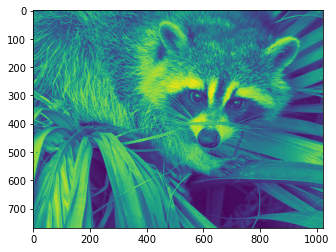

In [6]:
# Download the image in gray scale
face = scipy.misc.face(gray=True)
print(face.shape)
plt.imshow(face)

(249, 185)


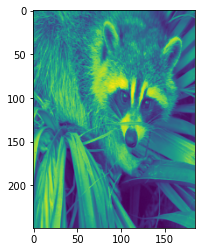

In [7]:
# Resize the image 
face_resized = resize(face, (249,185))
print(face_resized.shape)
plt.imshow(face_resized)

## Reconstructions of the image using (a) all, (b) 120, (c) 50, (d) 10 principal components

Energy lost: 1.1102230246251565e-14 percentage!


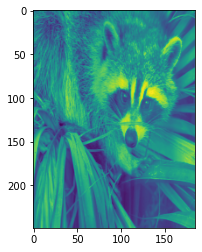

In [8]:
# Do we need to center here???
face_resized_centered = center_data(face_resized)
N,D = face_resized_centered.shape

# approximate using all principal components
face_resized_centered_approx_all = approximate_pca(face_resized_centered, D)
print("Energy lost:", get_energy_loss(face_resized_centered_approx_all, D) * 100, "percentage!")
plt.imshow(face_resized_centered_approx_all)

Energy lost: 0.19839207875116394 percentage!


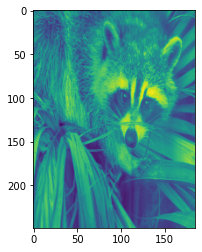

In [9]:
# approximate using 120 principal components
face_resized_centered_approx_120 = approximate_pca(face_resized_centered, 120)
print("Energy lost:", get_energy_loss(face_resized_centered_approx_all, 120) * 100, "percentage!")
plt.imshow(face_resized_centered_approx_120)

Energy lost: 2.484279836409853 percentage!


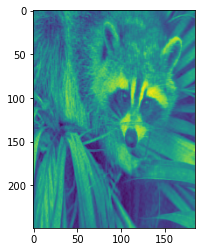

In [10]:
# approximate using 50 principal components
face_resized_centered_approx_50 = approximate_pca(face_resized_centered, 50)
print("Energy lost:", get_energy_loss(face_resized_centered_approx_all, 50) * 100, "percentage!")
plt.imshow(face_resized_centered_approx_50)

Energy lost: 17.60697102028812 percentage!


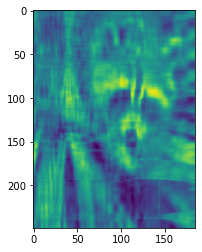

In [11]:
# approximate using 10 principal components
face_resized_centered_approx_10 = approximate_pca(face_resized_centered, 10)
print("Energy lost:", get_energy_loss(face_resized_centered_approx_all, 10) * 100, "percentage!")
plt.imshow(face_resized_centered_approx_10)

### At what number is the “energy” lost through truncation smaller than 1%?

In [12]:
# When using only 50 principal components the energy loss is 2.484279836409853 percentage as computed above. 
# We start at 50 and increase this until we reach an energy loss smaller than 1 percentage.
k = 50
while k <= D:
    # approximate using k principal components
    face_resized_centered_approx_k = approximate_pca(face_resized_centered, k)
    energy_loss_in_percentage = get_energy_loss(face_resized_centered_approx_all, k) * 100
    if energy_loss_in_percentage <= 1:
        print("When using", k, "principal components, the energy loss is", energy_loss_in_percentage, "percentage so it is smaller than 1 percentage.")
        k = D
    k += 1

When using 77 principal components, the energy loss is 0.981961837900236 percentage so it is smaller than 1 percentage.
